# General visualization of 1000 crime incidents

In [1]:
from arcgis.gis import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
philly_2006 = pd.read_csv(r'D:\GIS_Data\Analytics\PhillyCrime\Incidents_2006_subset.csv')

In [3]:
philly_2006.head()

,X,Y,DC_DIST,SECTOR,DISPATCH_DATE_TIME,DISPATCH_DATE,DISPATCH_TIME,HOUR,DC_KEY,LOCATION_BLOCK,UCR_GENERAL,OBJECTID,TEXT_GENERAL_CODE,POINT_X,POINT_Y,GlobalID
0,-75.177031,40.043967,14,J,2006-06-20T20:05:00.000Z,6/20/2006,20:05:00,NaN,2.006140e+11,100 BLOCK E PASTORIUS ST,400,1001,Aggravated Assault No Firearm,-75.177031,40.043967,d76805d2-791e-45ab-a188-c9a3a4612413
1,-75.178589,39.951086,9,F,2006-04-06T17:39:00.000Z,4/6/2006,17:39:00,NaN,2.006090e+11,2300 BLOCK WALNUT ST,400,1002,Aggravated Assault No Firearm,-75.178589,39.951086,2970c4fb-4fdb-46eb-8094-bf1108753a0a
2,-75.242987,39.919478,12,F,2006-03-31T21:12:00.000Z,3/31/2006,21:12:00,NaN,2.006120e+11,71ST/WOODLAND AVE,400,1003,Aggravated Assault No Firearm,-75.242987,39.919478,849f3dd1-06ca-4c9e-b49e-f7702a318eac
3,-75.222908,39.939689,12,Q,2006-08-04T23:05:00.000Z,8/4/2006,23:05:00,NaN,2.006120e+11,S 54TH ST /CHESTER AVE,400,1004,Aggravated Assault No Firearm,-75.222908,39.939689,342dd6a1-1e7f-40e0-a64e-5495af499a9f
4,-75.238402,39.922713,12,G,2006-08-05T13:03:00.000Z,8/5/2006,13:03:00,NaN,2.006120e+11,S 68TH ST /WOODLAND AVE,400,1005,Aggravated Assault No Firearm,-75.238402,39.922713,14c3958a-1fef-4dfb-ba5f-b34e7e8c6fe0


In [5]:
philly_2006.shape

(999, 16)

## Which crime is most likely to occur?

In [6]:
philly_2006.TEXT_GENERAL_CODE.value_counts()

Thefts                            338
Theft from Vehicle                243
Motor Vehicle Theft                90
Burglary Residential               80
Recovered Stolen Motor Vehicle     77
Aggravated Assault No Firearm      76
Robbery No Firearm                 51
Robbery Firearm                    18
Aggravated Assault Firearm         18
Burglary Non-Residential            7
Homicide - Criminal                 1
Name: TEXT_GENERAL_CODE, dtype: int64

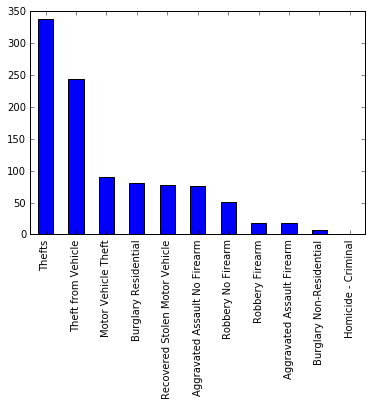

In [7]:
philly_2006.TEXT_GENERAL_CODE.value_counts().plot(kind='bar')

### Slice time and create the following columns
Year, Month, Day, Day_of_week, Hour

In [4]:
philly_2006['HOUR'] = [pd.to_datetime(f).hour for f in philly_2006.DISPATCH_DATE_TIME]

In [14]:
philly_2006['year'] = [pd.to_datetime(f).date().year for f in philly_2006.DISPATCH_DATE_TIME]

In [15]:
philly_2006['month'] = [pd.to_datetime(f).date().month for f in philly_2006.DISPATCH_DATE_TIME]

In [17]:
philly_2006['day_of_month'] = \
[pd.to_datetime(f).date().day for f in philly_2006.DISPATCH_DATE_TIME]

In [28]:
philly_2006['day_of_week'] = \
[pd.to_datetime(f).weekday_name for f in philly_2006.DISPATCH_DATE_TIME]

In [30]:
philly_2006.to_csv(r'D:\GIS_Data\Analytics\PhillyCrime\Incidents_2006_subset_timed.csv')

## Find which hour does each crime happen
Correlate Theft with hour

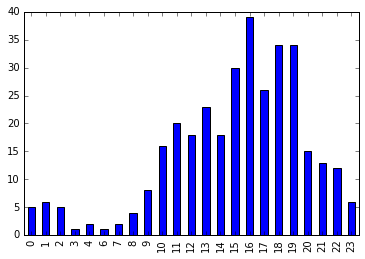

In [51]:
thefts = philly_2006[philly_2006['TEXT_GENERAL_CODE']=='Thefts']
xticks = np.arange(0,24) #for the x axis
thefts.HOUR.value_counts(sort=False).plot('bar')

In [52]:
np.random.permutation(len(thefts))

array([ 28, 286,  98,  43, 194, 210, 303, 136, 265,   3, 148, 151,  36,
       328, 189, 116, 236, 187, 135, 164, 191, 272, 219, 228,  46,  38,
        23, 125,  80, 327,  22, 138, 277, 211, 178, 165, 107,  14, 336,
        95, 105, 140,  27,  69, 218, 169, 179,  42, 139, 255, 231,  64,
        45, 329,  67, 267, 258, 253,  20, 312, 224, 173, 143, 268,  48,
       296, 305,  66,  55, 201,  86, 317,  90, 215, 288, 241, 104, 271,
        87, 275,  59, 331, 237,  32, 117,  49, 240,  26, 184, 158, 282,
       284, 100, 101, 324, 155, 245, 162, 156,  75, 175,  51, 234, 207,
       111, 167,   9, 114, 186, 109, 102,  30,  68, 332,  31, 239, 256,
       310, 323, 269, 293, 266, 177, 335, 299,  77, 322, 205, 166,  15,
       325, 270, 260, 106, 220,  52, 141, 209, 196,  71, 208, 254, 315,
       192,  33,  16, 146,  92, 222,  57,   7, 306,  10, 204, 300, 321,
       287, 257, 213, 110, 108, 225, 130, 103, 217,  60, 298,  94,  53,
       309, 263,  50, 127, 145, 250,  12,  72,  40,  84, 134, 33